# Context

This work is done by LINDER Théo in the context of the resit task for the class Python for Data analysis

# Dataset

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

## Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:  
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)  
2 sex - student's sex (binary: "F" - female or "M" - male)  
3 age - student's age (numeric: from 15 to 22)  
4 address - student's home address type (binary: "U" - urban or "R" - rural)  
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)  
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)  
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)  
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)  
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")  
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")  
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")  
12 guardian - student's guardian (nominal: "mother", "father" or "other")  
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)  
16 schoolsup - extra educational support (binary: yes or no)  
17 famsup - family educational support (binary: yes or no)  
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  
19 activities - extra-curricular activities (binary: yes or no)  
20 nursery - attended nursery school (binary: yes or no)  
21 higher - wants to take higher education (binary: yes or no)  
22 internet - Internet access at home (binary: yes or no)  
23 romantic - with a romantic relationship (binary: yes or no)  
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)  
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)  
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  
29 health - current health status (numeric: from 1 - very bad to 5 - very good)  
30 absences - number of school absences (numeric: from 0 to 93)

## these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)  
31 G2 - second period grade (numeric: from 0 to 20)  
32 G3 - final grade (numeric: from 0 to 20, output target)  

Additional note: there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.

# Code

## Downloading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
student_math_og = pd.read_csv('student-mat.csv', sep=';')
student_port_og = pd.read_csv('student-por.csv', sep=';')

In [3]:
student_math_og

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
student_port_og

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


## Encoding

As you can see, the data is not encoded. Let's encode it !

In [41]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

def encode_pd(df):
  # One Hot encoding for others columns
  df = pd.get_dummies(df, columns=['famsize', 'Mjob', 'Fjob', 'reason', 'guardian'])

  # Classic encoding for binary column
  for x in ('school', 'sex', 'address', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'):
    df[x] = label_encoder.fit_transform(df[x])

  return df

In [42]:
student_port = encode_pd(student_port_og)
student_math = encode_pd(student_math_og)

In [7]:
student_port

,school,sex,age,address,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,4,4,2,2,0,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,1,1,1,1,2,0,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,2,0,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,1,4,2,1,3,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,1,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,1,2,3,1,3,1,...,1,0,0,1,0,0,0,0,1,0
645,1,0,18,1,1,3,1,1,2,0,...,0,1,0,1,0,0,0,0,1,0
646,1,0,18,1,1,1,1,2,2,0,...,1,0,0,1,0,0,0,0,1,0
647,1,1,17,1,1,3,1,2,1,0,...,0,1,0,1,0,0,0,0,1,0


## Plotting

### Correlation Matrix

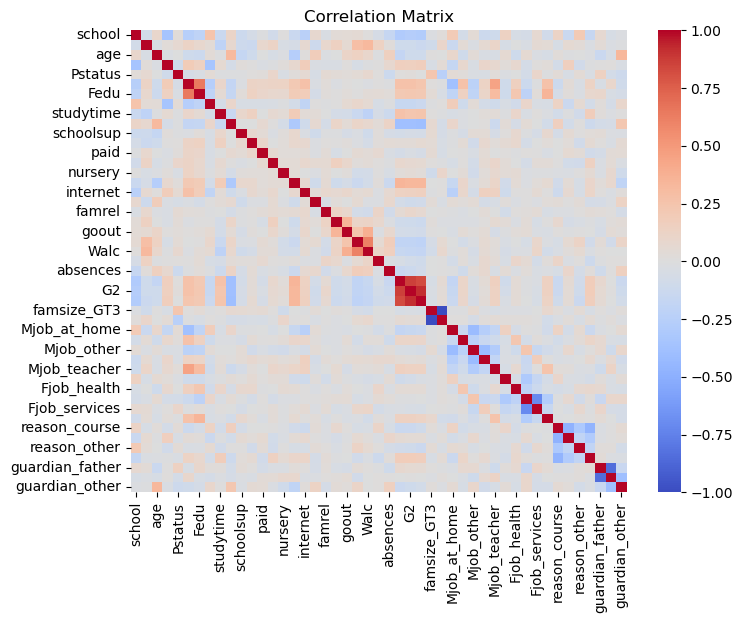

In [8]:
import seaborn as sns

corr_matrix = student_port.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Graphs

#### Distribution of age

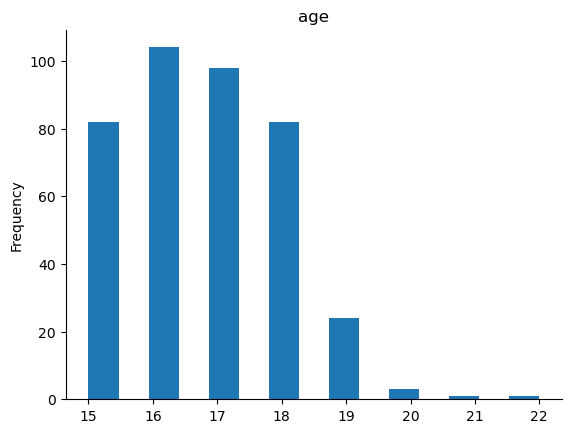

In [9]:
student_math['age'].plot(kind='hist', bins=15, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

#### First grade and absences repartition

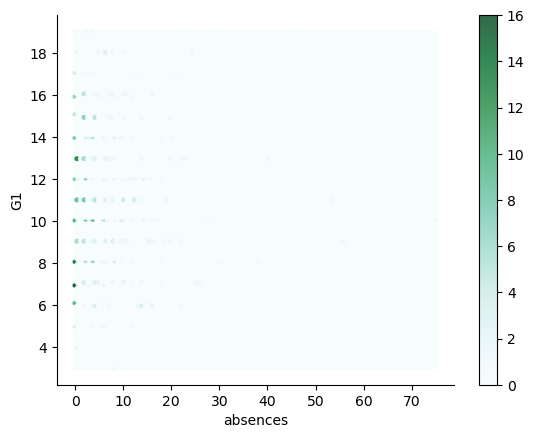

In [10]:
student_math.plot(kind='hexbin', x='absences', y='G1', alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#### First grade and studytime repartition

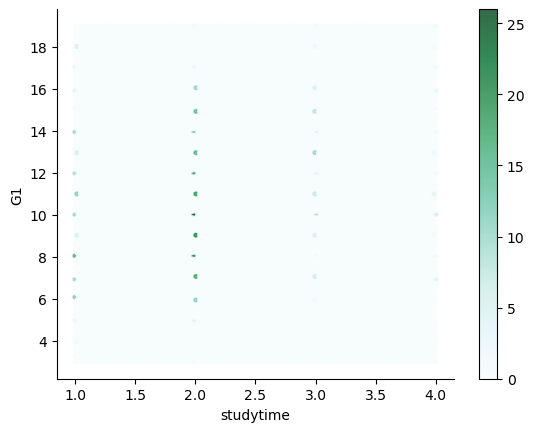

In [11]:
student_math.plot(kind='hexbin', x='studytime', y='G1', alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### Comparing density

In [12]:
def compare_density(df, x):
  fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 5))

  dfs = (df, df[df[x] != 0], df[df[x] == 0])
  gs = ('G1', 'G2', 'G3')
  tlt = ('', f'where {x}=True', f'where {x}=False')

  for i, d in enumerate(dfs):
    for j, g in enumerate(gs):
      ax = axs[i][j]
      d.plot(kind='density', y=g, alpha=.8, ax=ax)
      ax.set_title(f'{g} density {tlt[i]}')


  plt.tight_layout()
  plt.show()

#### Activities

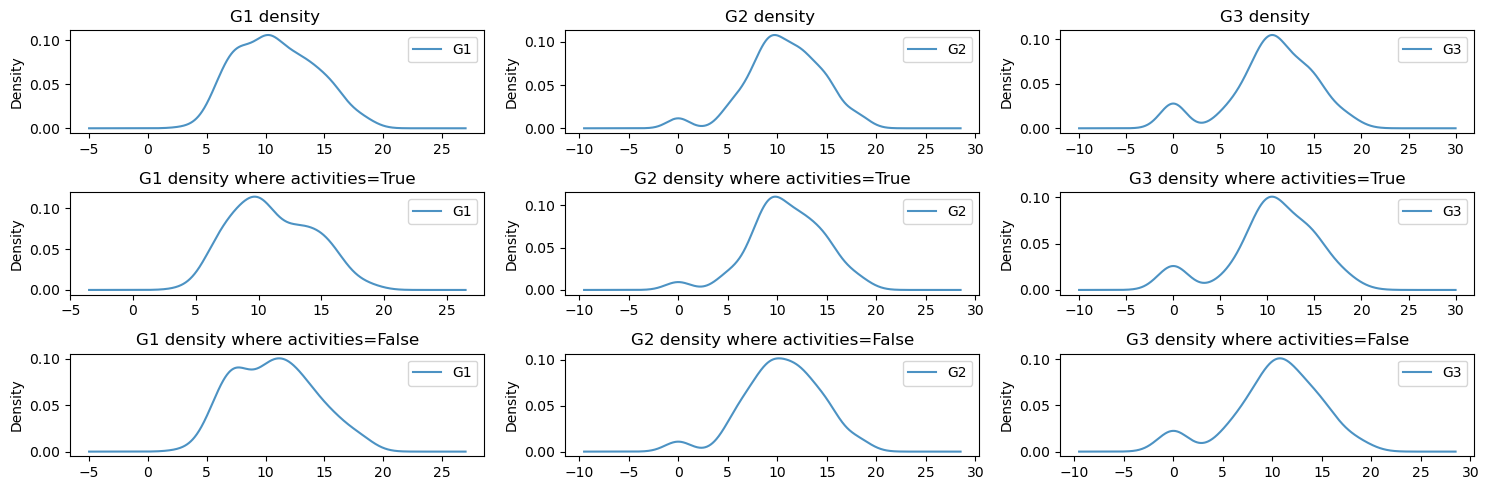

In [13]:
compare_density(student_math, 'activities')

#### Internet

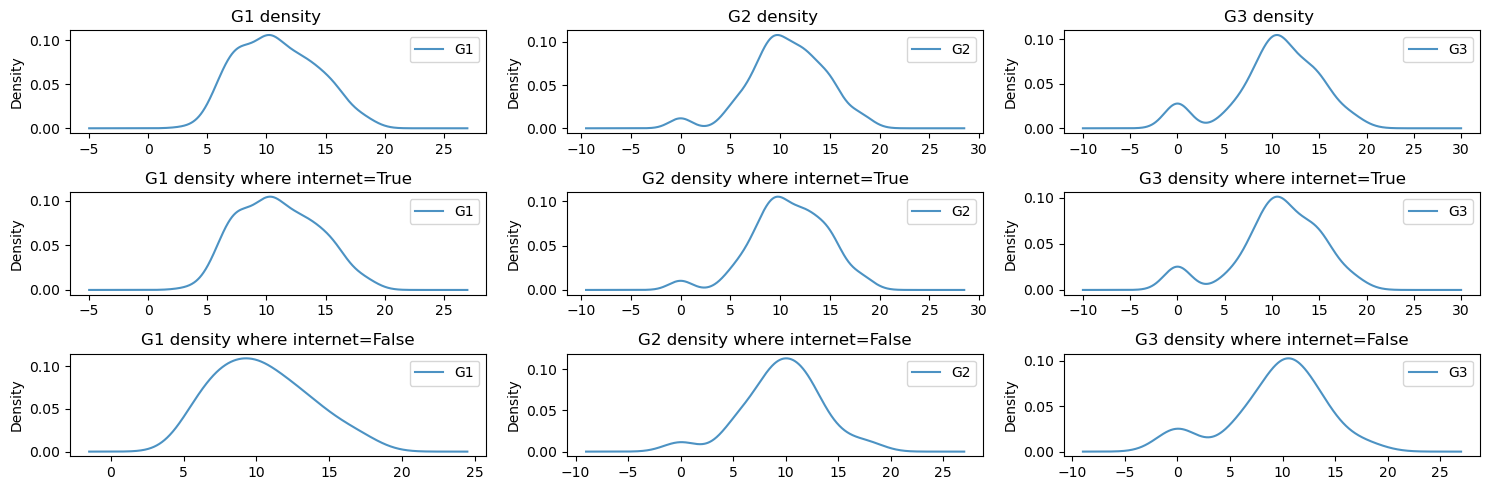

In [14]:
compare_density(student_math, 'internet')

#### Famrel

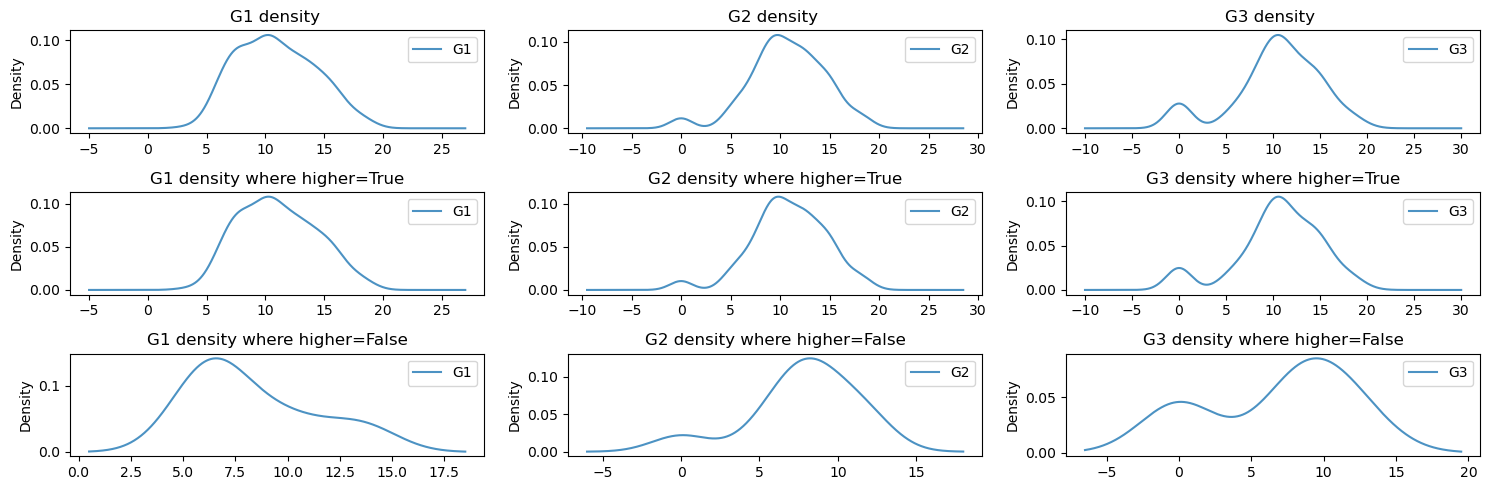

In [15]:
compare_density(student_math, 'higher')

### Comparing frequencies depending on grade

In [16]:
def compare_frequencies(df, x):
  fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 5))

  gs = ('G1', 'G2', 'G3')

  for j, g in enumerate(gs):
    dfs = (df, df[df[g] >= 10], df[df[g] < 10])
    tlt = ('', f'where {g}>=10', f'where {g}<10')

    for i, d in enumerate(dfs):
      ax = axs[i][j]
      vc = d[x].value_counts()
      vc.plot(kind='pie', ax=ax)
      ax.set_title(f'{g} pie {tlt[i]}')

  plt.tight_layout()
  plt.show()

#### Sex

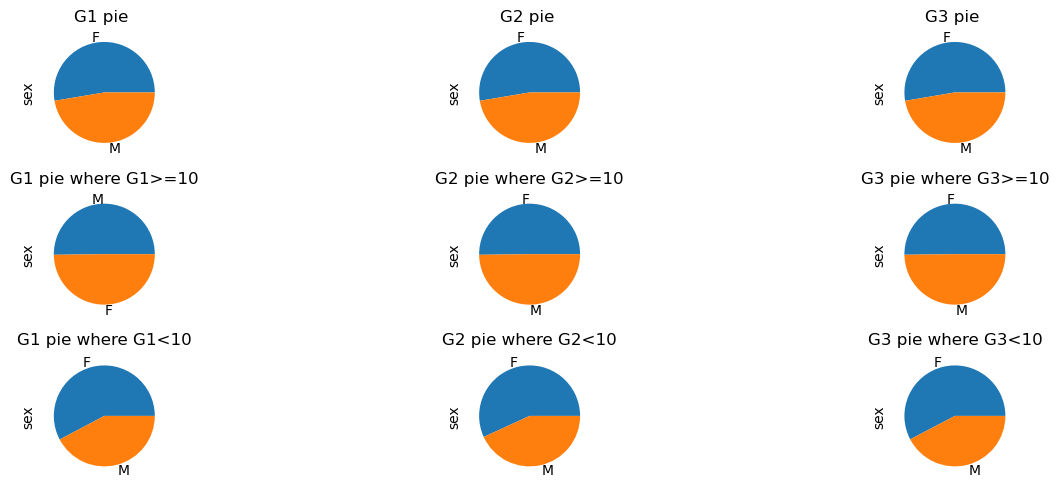

In [17]:
compare_frequencies(student_math_og, 'sex')

#### Pstatus

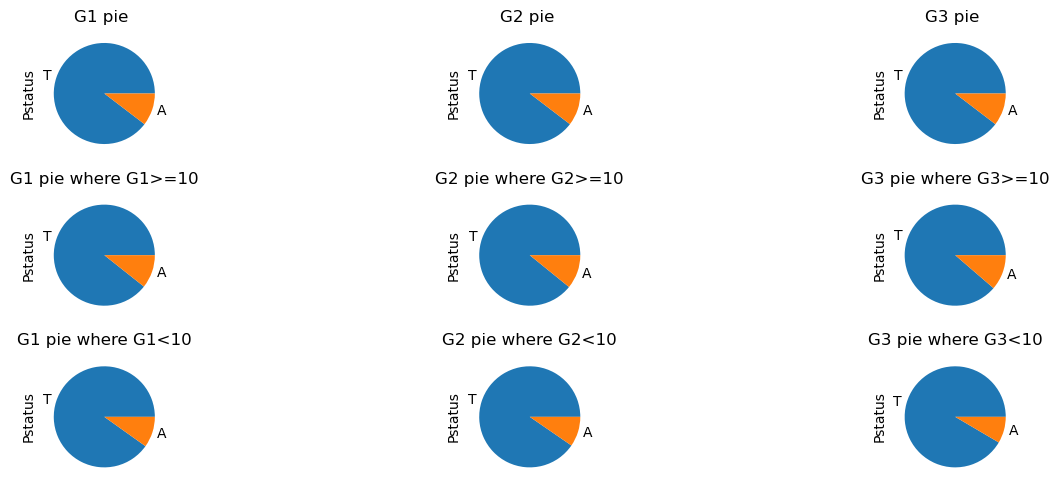

In [18]:
compare_frequencies(student_math_og, 'Pstatus')

#### studytime

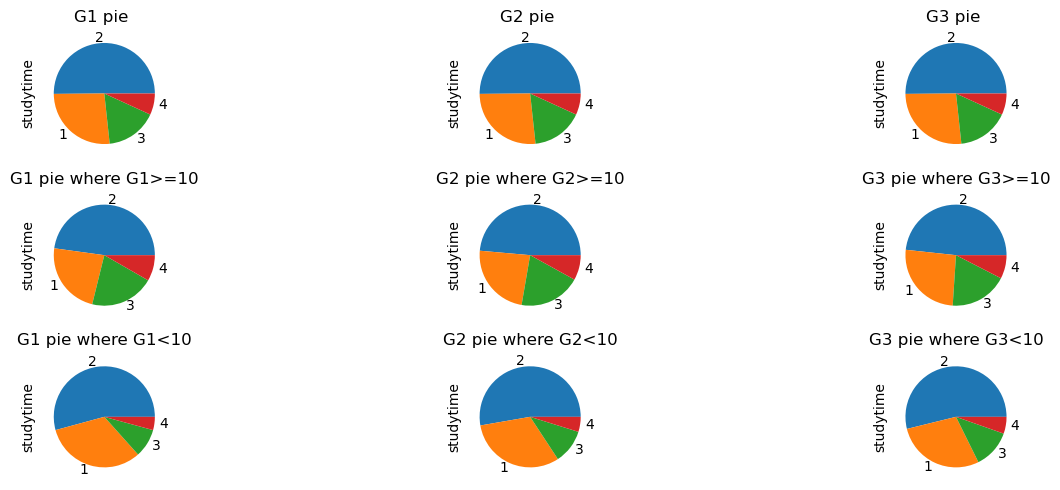

In [19]:
compare_frequencies(student_math_og, 'studytime')

# Modeling

## Data preparation

In [20]:
from sklearn.model_selection import train_test_split

def split_df(df: pd.DataFrame, y:list):
  dfX = df.drop(columns=y)
  dfY = df[y]
  return train_test_split(dfX, dfY, test_size=0.2, random_state=42)


## Modeling

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

def find_model(df, y):
  X_train, X_test, Y_train, Y_test = split_df(student_math, y=y)

  param_grid = {
      RandomForestRegressor(): {
          'n_estimators': [50, 100, 150],
          'max_depth': [None, 10, 20],
          'min_samples_split': [2, 5, 10]
      },
      DecisionTreeRegressor(): {
          'max_depth': [None, 10, 20],
          'min_samples_split': [2, 5, 10]
      },
      MLPRegressor(max_iter=3000): {
          'hidden_layer_sizes': [(25, 10), (25, 25), (25, 25, 10)],
          'activation': ['relu', 'tanh'],
          'alpha': [0.0001, 0.001, 0.01]
      }
  }

  best_model=None

  for estimator, grid in param_grid.items():
    grid_search = GridSearchCV(estimator=estimator, param_grid=grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
    grid_search.fit(X_train, Y_train)
    model = grid_search.best_estimator_
    accuracy = mean_squared_error(model.predict(X_test), Y_test)

    if best_model is None or accuracy > best_model_accuracy:
      best_model = model
      best_grid = grid_search
      best_model_accuracy = accuracy

  print("Model:", best_model)
  print("Parameters:", best_grid.best_params_)
  print("Model score:", best_model_accuracy)
  return best_model

In [22]:
model = find_model(student_port, ['G1', 'G2', 'G3'])

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Model: MLPRegressor(alpha=0.001, hidden_layer_sizes=(25, 10), max_iter=3000)
Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (25, 10)}
Model score: 22.50028898585008


# API

## Note

You can configure the model as you wish by editing the following cell
- You can either use 'student_math' or 'student_port' dataset
- You can configure the output features : G1, G2, G3

Note, If you pass G1, G2 and G3, the model will try to predict all grades based on the other features.
If you only pass G3, the model will try to predict G3 using G1, G2 and all the other features

In [57]:
dataset = student_port
output = ['G1', 'G2', 'G3']

## Code

In [60]:
model = find_model(dataset, output)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: DecisionTreeRegressor(max_depth=10, min_samples_split=10)
Parameters: {'max_depth': 10, 'min_samples_split': 10}
Model score: 21.804922104451208


/usr/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [73]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json(force=True)
        df = pd.DataFrame([data])
        df_enc = encode_pd(df)

        columns_copy = df_enc.columns
        for c in dataset.columns:
            if not c in columns_copy:
                df_enc[c] = 0
                
        df_enc = df_enc.reindex(columns=dataset.columns)
        df_enc = df_enc.drop(columns=output)
        result = model.predict(df_enc)[0]
        result = { e:result[i] for i, e in enumerate(output) }
        return jsonify(result), 200
    except Exception as e:
        return jsonify({'error': str(e)}), 500

In [ ]:
if __name__ == '__main__':
    app.run(debug=True, port=8070, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:8070
Press CTRL+C to quit
127.0.0.1 - - [05/May/2024 17:52:23] "POST /predict HTTP/1.1" 200 -


## Result

By doing a POST request at http://localhost:8070/predict with the following body :

{
    "school":"GP",
    "sex":"F",
    "age":18,
    "address":"U",
    "famsize":"GT3",
    "Pstatus":"T",
    "Medu":4,
    "Fedu":3,
    "Mjob":"health",
    "Fjob":"other",
    "reason":"course",
    "guardian":"father",
    "traveltime":2,
    "studytime":3,
    "failures":0,
    "schoolsup":"yes",
    "famsup":"yes",
    "paid":"yes",
    "activities":"yes",
    "nursery":"no",
    "higher":"yes",
    "internet":"yes",
    "romantic":"yes",
    "famrel":"2",
    "freetime":"3",
    "goout":"3",
    "Dalc":0,
    "Walc":1,
    "health":3,
    "absences":2
}

We obtain the result :

{
    "G1": 8.25,
    "G2": 6.25,
    "G3": 4.75
}

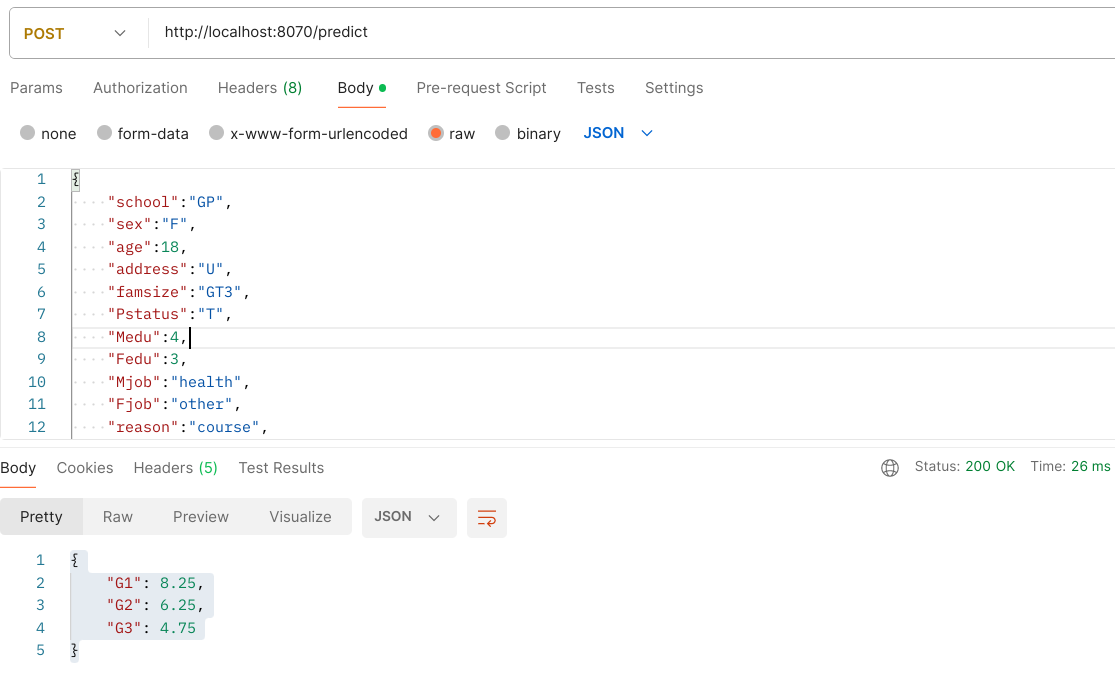